# Notebook for analysing Limit Order Book

In [265]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import csv
import random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

from BSE import market_session

In [266]:
id = 'new_trader_chart_0_'
file_path = id + 'LOB_frames.csv'
prices = id + "tape.csv"
volumes = id + 'blotters.csv'
balances = id + 'avg_balance.csv'


#file_path = 'smith_chart_vol_200_0_LOB_frames.csv'
##prices = 'smith_chart_vol_200_0_tape.csv'
#volumes = 'smith_chart_vol_200_0_blotters.csv'

The format is for example [0.800, Bid:,1,274,1,Ask:,1,349,1,] represents that at time t=0.8, there was one 1 bid order, price 274 and quantity 1

In [267]:
# Initialize lists
time_list, bid_total_quantity, bid_prices, bid_quantities = [], [], [], []
ask_total_quantity, ask_prices, ask_quantities = [], [], []

# Read the file and parse the data
with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()
        
        # Split the line using "Bid:" and "Ask:" as delimiters
        parts = re.split(r'(Bid:|Ask:)', line)
        time_stamp = float(parts[0].strip().rstrip(','))
        
        # Parse bid and ask data
        bid_data, ask_data = [], []
        for i in range(1, len(parts) - 1, 2):
            values = [int(val) for val in parts[i + 1].strip().split(',') if val.strip().isdigit()]
            if parts[i] == 'Bid:':
                bid_data = values
            elif parts[i] == 'Ask:':
                ask_data = values
        
        # Extract and assign bid data
        if bid_data:
            bid_total_quantity.append(bid_data[0])
            bid_prices.append(bid_data[1::2])  # Take prices at odd indices
            bid_quantities.append(bid_data[2::2])  # Take quantities at even indices
        else:
            bid_total_quantity.append(None)
            bid_prices.append([])
            bid_quantities.append([])
        
        # Extract and assign ask data
        if ask_data:
            ask_total_quantity.append(ask_data[0])
            ask_prices.append(ask_data[1::2])  # Take prices at odd indices
            ask_quantities.append(ask_data[2::2])  # Take quantities at even indices
        else:
            ask_total_quantity.append(None)
            ask_prices.append([])
            ask_quantities.append([])

        # Store the timestamp
        time_list.append(time_stamp)

# Create the expanded DataFrame
expanded_df = pd.DataFrame({
    'Time': time_list,
    'Bid Total Quantity': bid_total_quantity,
    'Bid Prices': [', '.join(map(str, prices)) for prices in bid_prices],
    'Bid Quantities': [', '.join(map(str, quantities)) for quantities in bid_quantities],
    'Ask Total Quantity': ask_total_quantity,
    'Ask Prices': [', '.join(map(str, prices)) for prices in ask_prices],
    'Ask Quantities': [', '.join(map(str, quantities)) for quantities in ask_quantities]
})

# Display the expanded DataFrame
expanded_df.head(30)


,Time,Bid Total Quantity,Bid Prices,Bid Quantities,Ask Total Quantity,Ask Prices,Ask Quantities
0,0.00,0,,,0,,
1,5.05,1,230,1,0,,
2,5.10,1,230,1,1,487,1
3,5.15,1,230,1,2,"487, 500","1, 1"
4,5.20,0,,,2,"487, 500","1, 1"
5,5.25,0,,,2,"404, 500","1, 1"
6,5.30,1,169,1,2,"404, 500","1, 1"
7,5.35,2,"142, 169","1, 1",2,"404, 500","1, 1"
8,5.40,2,"142, 169","1, 1",3,"245, 404, 500","1, 1, 1"
9,5.45,3,"88, 142, 169","1, 1, 1",3,"245, 404, 500","1, 1, 1"


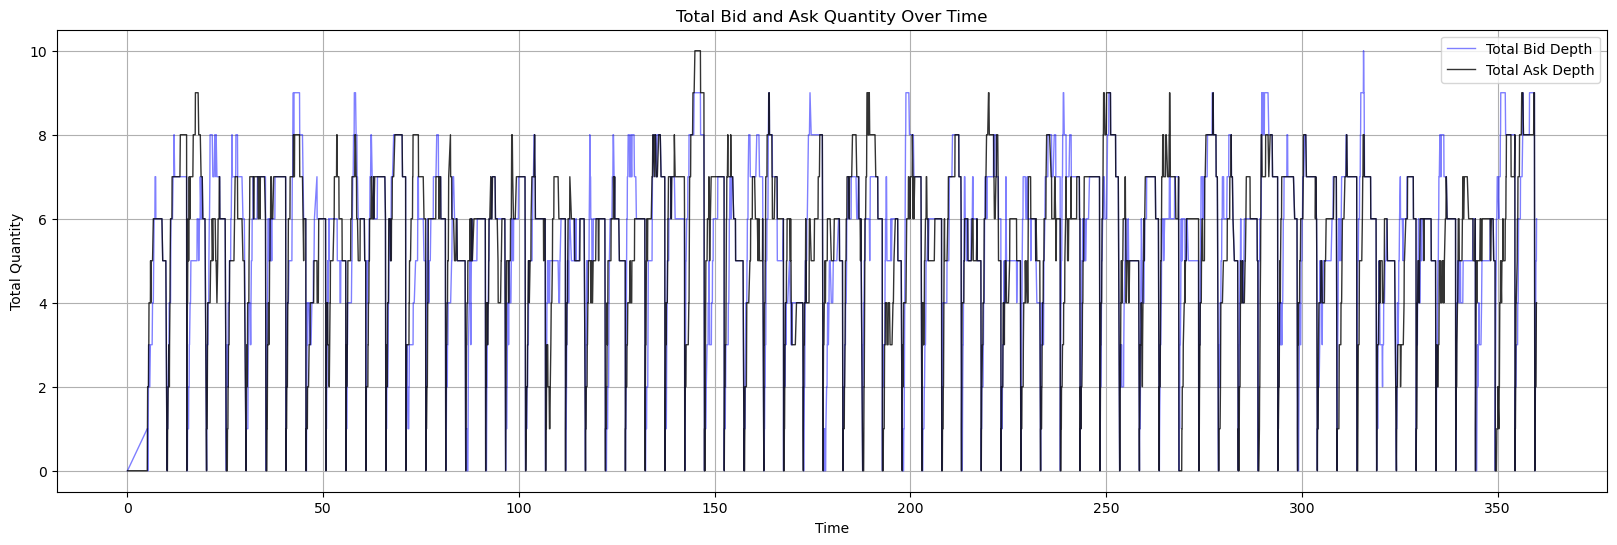

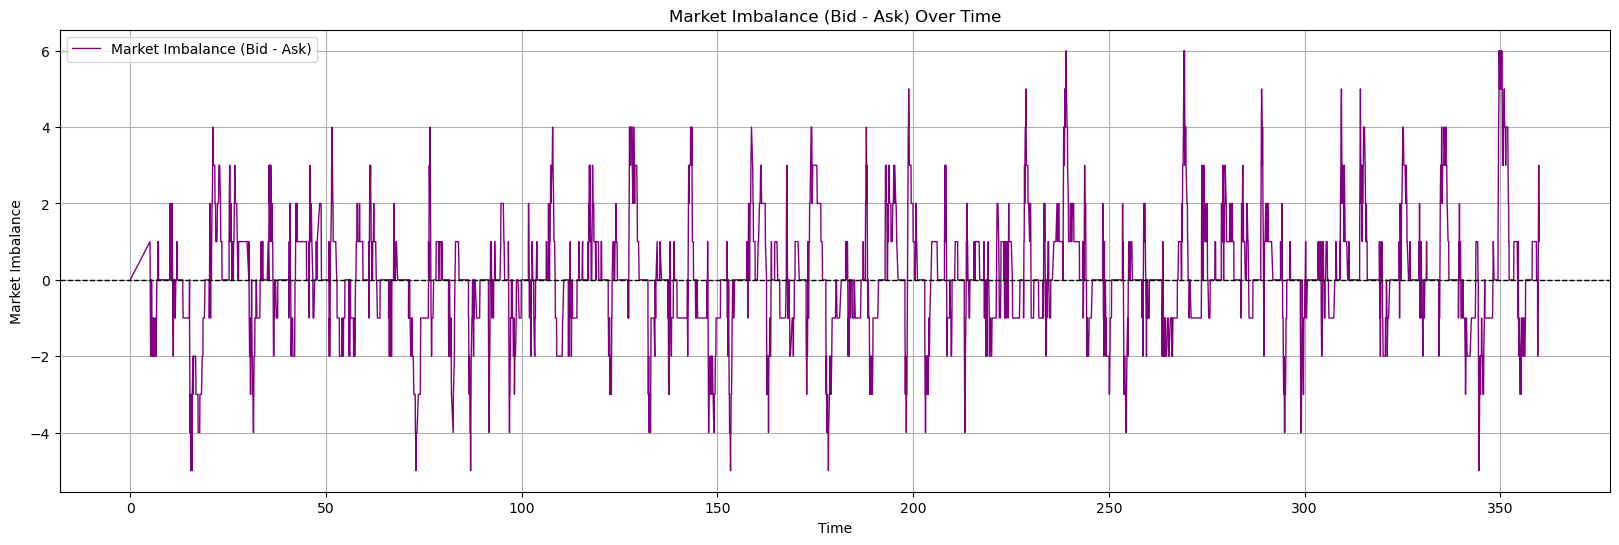

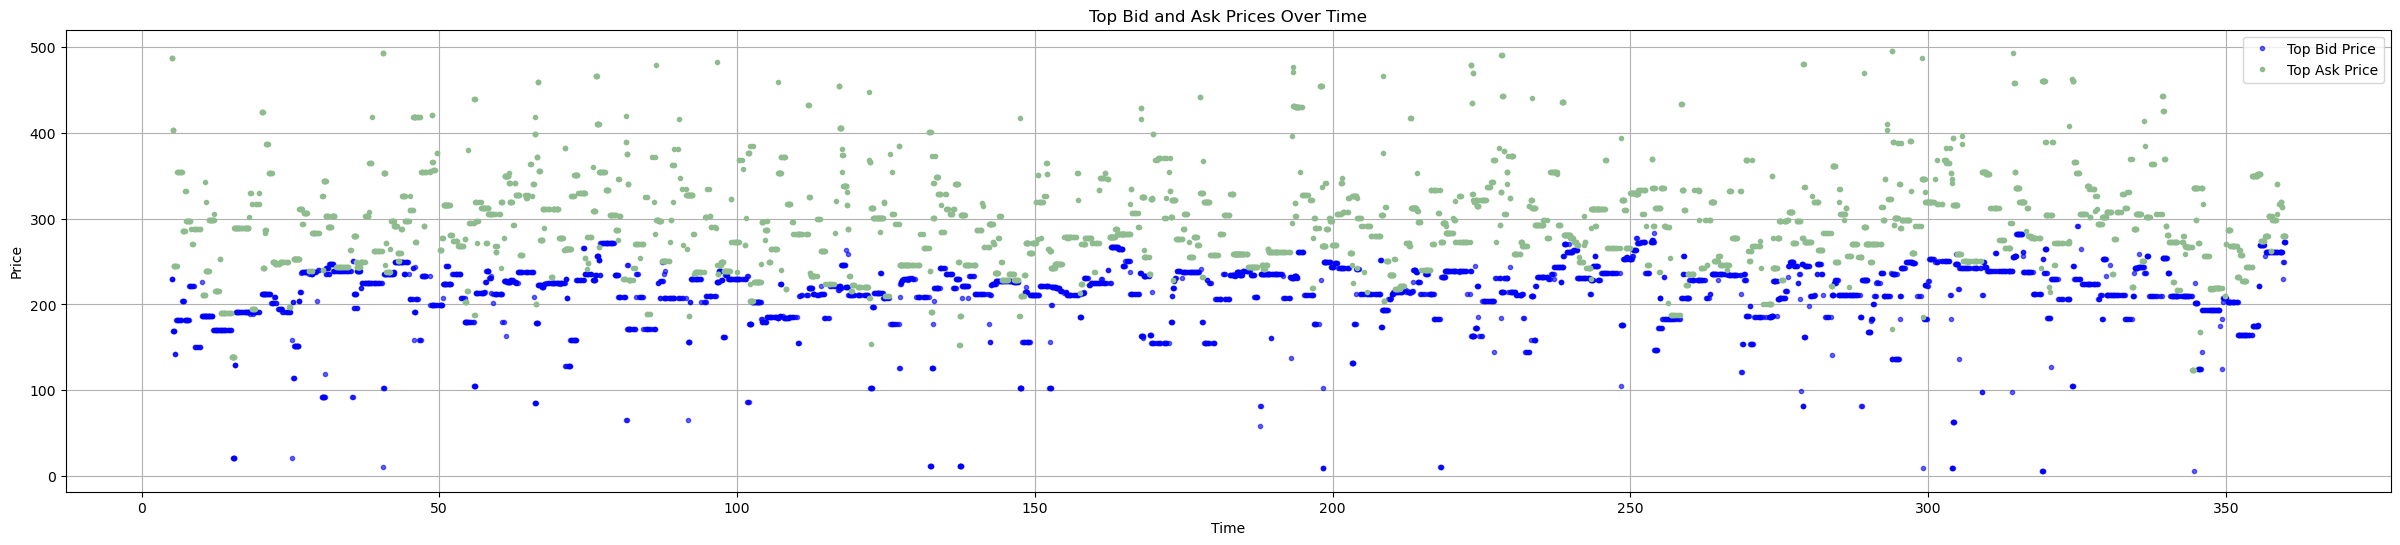

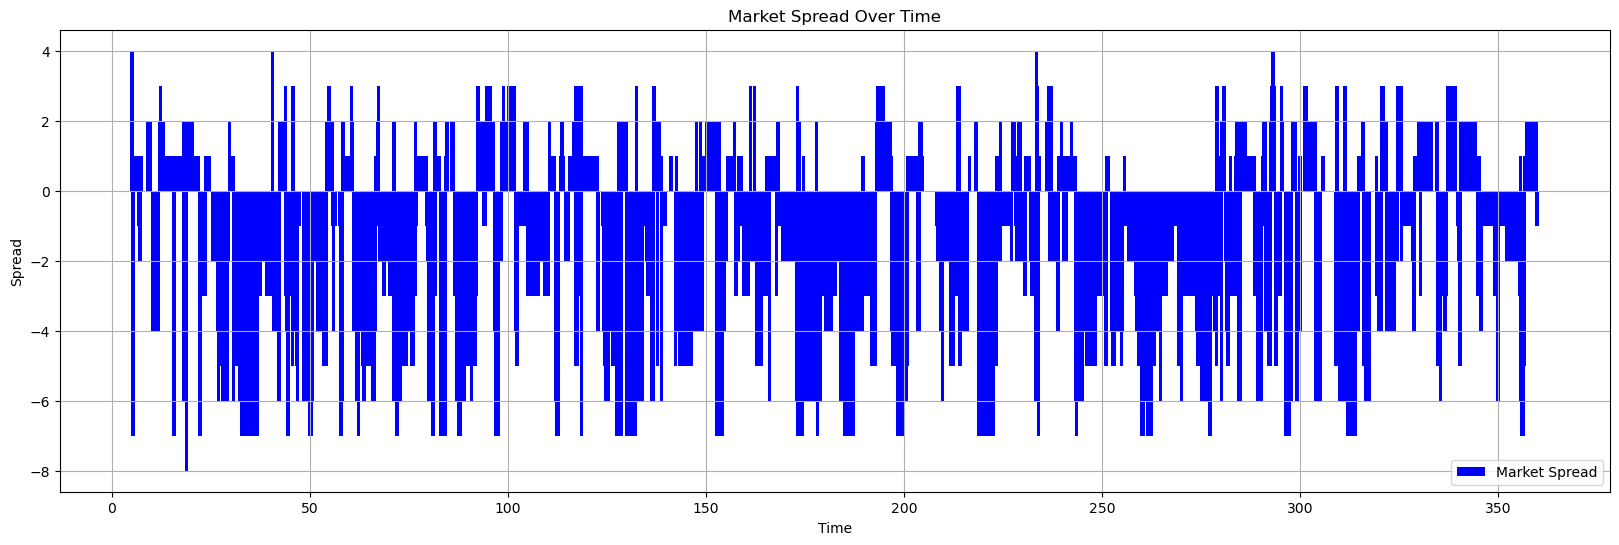

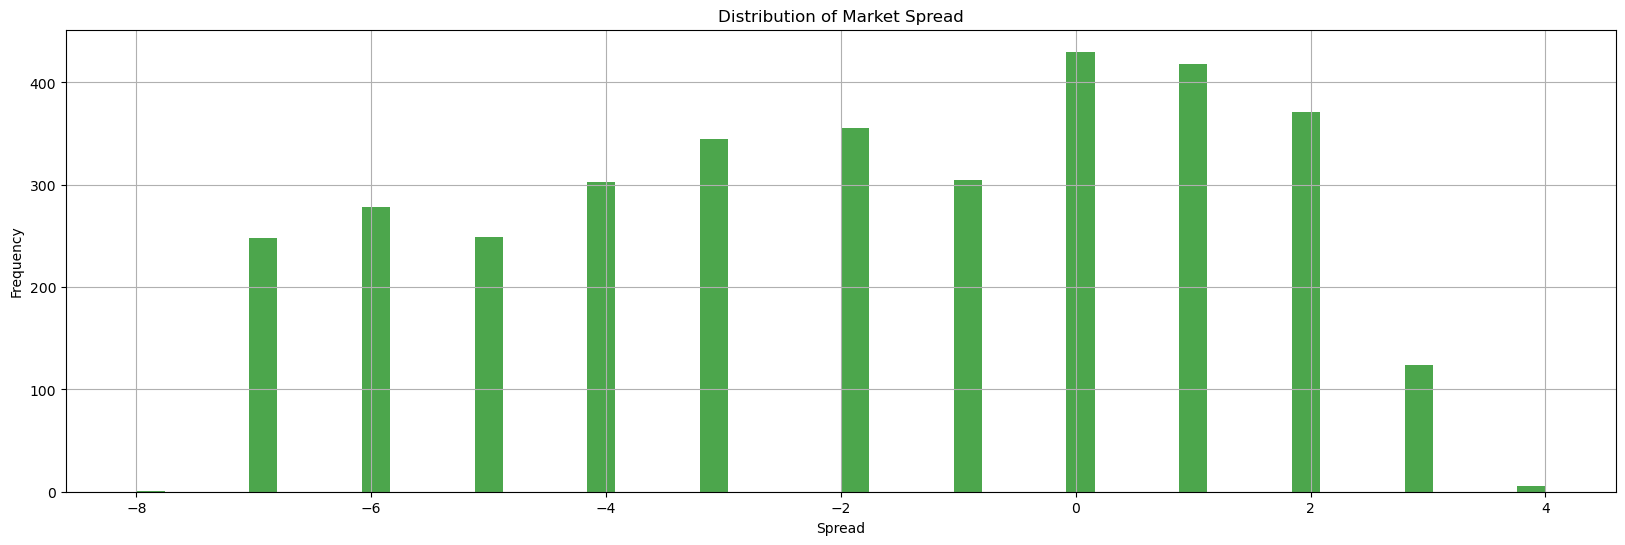

In [263]:
import matplotlib.pyplot as plt

# Extract bid and ask total quantities over time
time_series = expanded_df['Time']
bid_total_depth = expanded_df['Bid Total Quantity']
ask_total_depth = expanded_df['Ask Total Quantity']

# Plotting total depth over time
plt.figure(figsize=(20, 6))
plt.plot(time_series, bid_total_depth, label='Total Bid Depth', color='blue', marker='', linestyle='-',linewidth = '1', alpha = 0.5)
plt.plot(time_series, ask_total_depth, label='Total Ask Depth', color='black', marker='', linestyle='-',linewidth = '1', alpha = 0.8)

plt.xlabel('Time')
plt.ylabel('Total Quantity')
plt.title('Total Bid and Ask Quantity Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plotting depth comparison (market imbalance)
plt.figure(figsize=(20, 6))
market_imbalance = bid_total_depth - ask_total_depth
plt.plot(time_series, market_imbalance, label='Market Imbalance (Bid - Ask)', color='purple', marker='', linestyle='-', linewidth = '1')

plt.xlabel('Time')
plt.ylabel('Market Imbalance')
plt.title('Market Imbalance (Bid - Ask) Over Time')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Reference line for balance point
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns
# Top Bid/Ask Levels: Extract and visualize the top bid and ask prices at each time point
plt.figure(figsize=(30, 6))
plt.plot(expanded_df['Time'], [float(prices.split(', ')[-1]) if prices else None for prices in expanded_df['Bid Prices']], label='Top Bid Price', color='blue', marker = '.', linestyle = '', alpha = 0.6)
plt.plot(expanded_df['Time'], [float(prices.split(', ')[0]) if prices else None for prices in expanded_df['Ask Prices']], label='Top Ask Price', color='darkseagreen', marker = '.', linestyle = 'none')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Top Bid and Ask Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Market Spread Analysis
# Spread over Time
spread = expanded_df.apply(lambda row: float(row['Ask Prices'][0]) - float(row['Bid Prices'][-1]) if row['Ask Prices'] and row['Bid Prices'] else None, axis=1)
plt.figure(figsize=(20, 6))
plt.bar(expanded_df['Time'], spread, color='blue', label='Market Spread',)
plt.xlabel('Time')
plt.ylabel('Spread')
plt.title('Market Spread Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Spread Histogram
plt.figure(figsize=(20, 6))
plt.hist(spread.dropna(), bins=50, color='green', alpha=0.7)
plt.xlabel('Spread')
plt.ylabel('Frequency')
plt.title('Distribution of Market Spread')
plt.grid(True)
plt.show()


In [268]:
expanded_df.head()

,Time,Bid Total Quantity,Bid Prices,Bid Quantities,Ask Total Quantity,Ask Prices,Ask Quantities
0,0.00,0,,,0,,
1,5.05,1,230,1,0,,
2,5.10,1,230,1,1,487,1
3,5.15,1,230,1,2,"487, 500","1, 1"
4,5.20,0,,,2,"487, 500","1, 1"


In [269]:
def convert_to_float_list(price_data):
    # Check if the data is already a list
    if isinstance(price_data, list):
        # If it's already a list, ensure all elements are floats
        return [float(price) for price in price_data]
    else:
        # If it's a string, remove surrounding brackets and split by commas
        price_data = price_data.strip("[]")
        return [float(price) for price in price_data.split(',') if price.strip()]

# Convert 'Ask Prices' and 'Bid Prices' columns to lists of floats
expanded_df['Ask Prices'] = expanded_df['Ask Prices'].apply(convert_to_float_list)
expanded_df['Bid Prices'] = expanded_df['Bid Prices'].apply(convert_to_float_list)

# Calculate the bid-ask spread as the difference between the lowest ask price and the highest bid price
expanded_df['Bid-Ask Spread'] = expanded_df.apply(
    lambda row: min(row['Ask Prices']) - max(row['Bid Prices']) if row['Ask Prices'] and row['Bid Prices'] else np.nan,
    axis=1
)
expanded_df.head(20)

,Time,Bid Total Quantity,Bid Prices,Bid Quantities,Ask Total Quantity,Ask Prices,Ask Quantities,Bid-Ask Spread
0,0.00,0,[],,0,[],,NaN
1,5.05,1,[230.0],1,0,[],,NaN
2,5.10,1,[230.0],1,1,[487.0],1,257.0
3,5.15,1,[230.0],1,2,"[487.0, 500.0]","1, 1",257.0
4,5.20,0,[],,2,"[487.0, 500.0]","1, 1",NaN
5,5.25,0,[],,2,"[404.0, 500.0]","1, 1",NaN
6,5.30,1,[169.0],1,2,"[404.0, 500.0]","1, 1",235.0
7,5.35,2,"[142.0, 169.0]","1, 1",2,"[404.0, 500.0]","1, 1",235.0
8,5.40,2,"[142.0, 169.0]","1, 1",3,"[245.0, 404.0, 500.0]","1, 1, 1",76.0
9,5.45,3,"[88.0, 142.0, 169.0]","1, 1, 1",3,"[245.0, 404.0, 500.0]","1, 1, 1",76.0


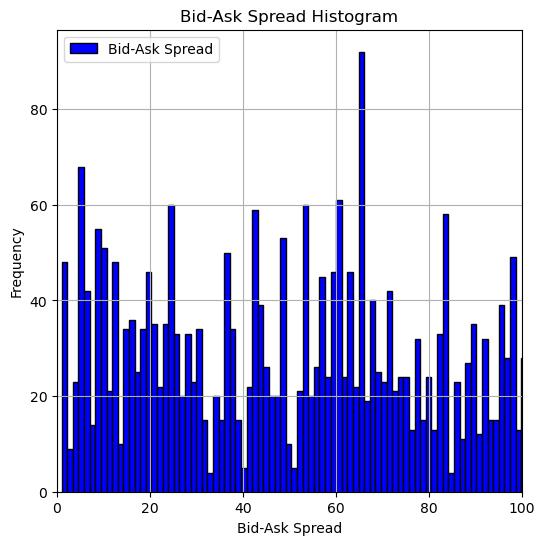

In [270]:
# Drop rows with NaN values in the spread (if there are rows with missing bid or ask prices)
spread_data = expanded_df.dropna(subset=['Bid-Ask Spread'])

# Plot the bid-ask spread over time
plt.figure(figsize=(6, 6))
plt.hist( spread_data['Bid-Ask Spread'], color='blue', label='Bid-Ask Spread', bins = 400, edgecolor = 'black')
plt.xlim(0,100)
plt.xlabel('Bid-Ask Spread')
plt.ylabel('Frequency')
plt.title('Bid-Ask Spread Histogram')
plt.legend()
plt.grid(True)
plt.show()

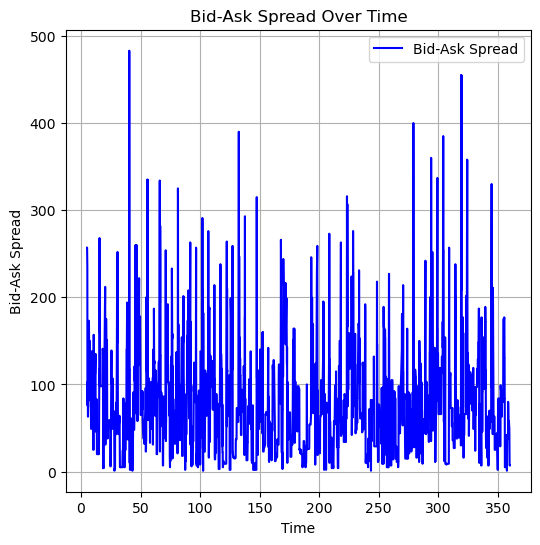

In [271]:
# Drop rows with NaN values in the spread (if there are rows with missing bid or ask prices)
spread_data = expanded_df.dropna(subset=['Bid-Ask Spread'])

# Plot the bid-ask spread over time
plt.figure(figsize=(6, 6))
plt.plot(spread_data['Time'], spread_data['Bid-Ask Spread'], color='blue', label='Bid-Ask Spread')
plt.xlabel('Time')
plt.ylabel('Bid-Ask Spread')
plt.title('Bid-Ask Spread Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [288]:
import pandas as pd

# Initialize an empty list to store each trade as a dictionary
trades = []

# Variable to keep track of the current trader ID
current_trader = None

# Open and read the CSV file line by line
with open(volumes, 'r') as file:
    for line in file:
        parts = line.strip().split(', ')
        
        # Check if line indicates a new trader's trade count (e.g., "B00, 8")
        if len(parts) == 2 and parts[1].isdigit():
            current_trader = parts[0]  # Set the trader ID (e.g., "B00")
        
        # Check if line has enough parts to be a trade entry
        elif len(parts) >= 7:
            # Create a dictionary for each trade entry
            trade = {
                'TraderID': current_trader,
                'Type': parts[1],
                'Timestamp': float(parts[2]),
                'Price': int(parts[3]),
                'Seller': parts[4],
                'Buyer': parts[5],
                'Quantity': int(parts[6])
            }
            trades.append(trade)
        else:
            print(f"Skipping line due to unexpected format: {line}")

# Convert the list of trades to a DataFrame
blotters = pd.DataFrame(trades)

# Display the resulting DataFrame
blotters.head(10)


,TraderID,Type,Timestamp,Price,Seller,Buyer,Quantity
0,B03,Trade,152.65,156,B03,S01,1
1,B04,Trade,110.20,185,B04,S02,1
2,B04,Trade,169.55,164,B04,S02,1
3,B04,Trade,178.25,179,B04,S03,1
4,B04,Trade,224.55,185,B04,S03,1
5,B04,Trade,232.30,184,B04,S01,1
6,B04,Trade,320.60,184,B04,S01,1
7,B05,Trade,5.55,169,B05,S01,1
8,B05,Trade,25.50,203,B05,S00,1
9,B05,Trade,54.30,207,B05,S03,1


In [273]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the data with columns 'Timestamp' and 'Price'

# Sort by 'Timestamp' first, and then by 'Price' in case of ties in 'Timestamp'
blotters = blotters.sort_values(by=['Timestamp', 'Price'], ascending=[True, True])

# Display or work with the sorted DataFrame
blotters.head(10)


,TraderID,Type,Timestamp,Price,Seller,Buyer,Quantity
148,B08,Trade,5.20,230,B08,S00,1
273,S00,Trade,5.20,230,B08,S00,1
7,B05,Trade,5.55,169,B05,S01,1
333,S01,Trade,5.55,169,B05,S01,1
208,B09,Trade,5.95,245,S05,B09,1
519,S05,Trade,5.95,245,S05,B09,1
31,B06,Trade,7.25,204,B06,S03,1
438,S03,Trade,7.25,204,B06,S03,1
87,B07,Trade,9.00,222,B07,S02,1
389,S02,Trade,9.00,222,B07,S02,1


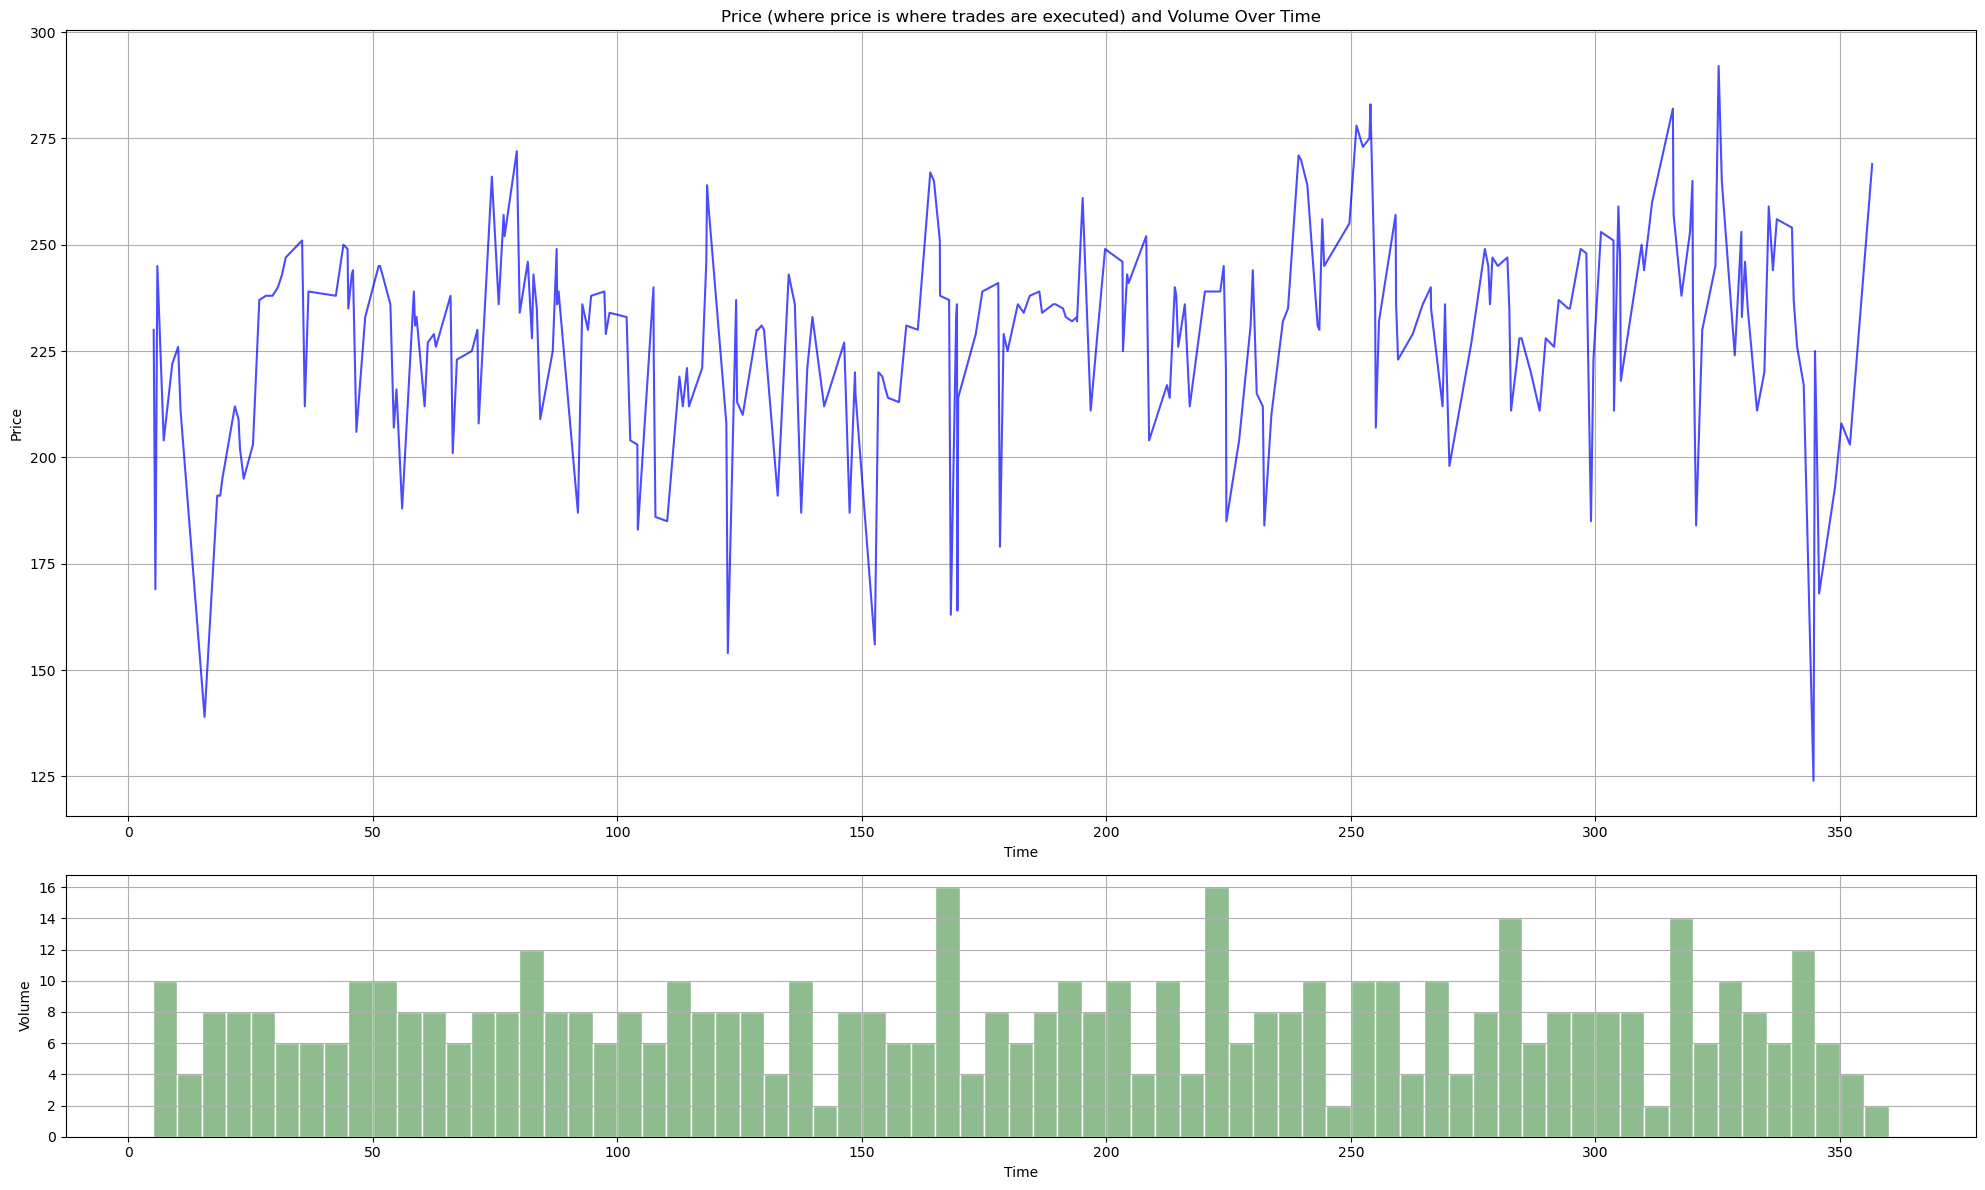

In [274]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import matplotlib.gridspec as gridspec

x = []
y = []
with open(prices, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            time = float(row[1])
            price = float(row[2])
            x = np.append(x,time)
            y = np.append(y,price)

# Set up a GridSpec layout for stacked plots
fig = plt.figure(figsize=(20, 12))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])  # Allocate 3x space to price plot and 1x to volume plot

min_timestamp = blotters['Timestamp'].min()
max_timestamp = blotters['Timestamp'].max()

# Main price plot (top)
ax1 = fig.add_subplot(gs[0])
#ax1.plot(x, y, color='blue', linestyle='-', alpha = 0.7)
ax1.plot(blotters['Timestamp'], blotters['Price'], color='blue', linestyle='-', alpha = 0.7)
ax1.set_xlabel('Time')
ax1.set_ylabel('Price')
ax1.grid(True)
ax1.set_title('Price (where price is where trades are executed) and Volume Over Time')

# Volume histogram plot (bottom)
ax2 = fig.add_subplot(gs[1], sharex=ax1)  # Share the x-axis with the main plot

# Define bins for the volume histogram
bin_width = 5
bins = range(int(min_timestamp), int(max_timestamp) + bin_width, bin_width)

# Plot the volume data as a histogram
ax2.hist(blotters['Timestamp'], bins=bins, edgecolor='white', alpha=1, color = 'darkseagreen')
ax2.set_xlabel('Time')
ax2.grid(True)
ax2.set_ylabel('Volume')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### Plotting volatility against volume 

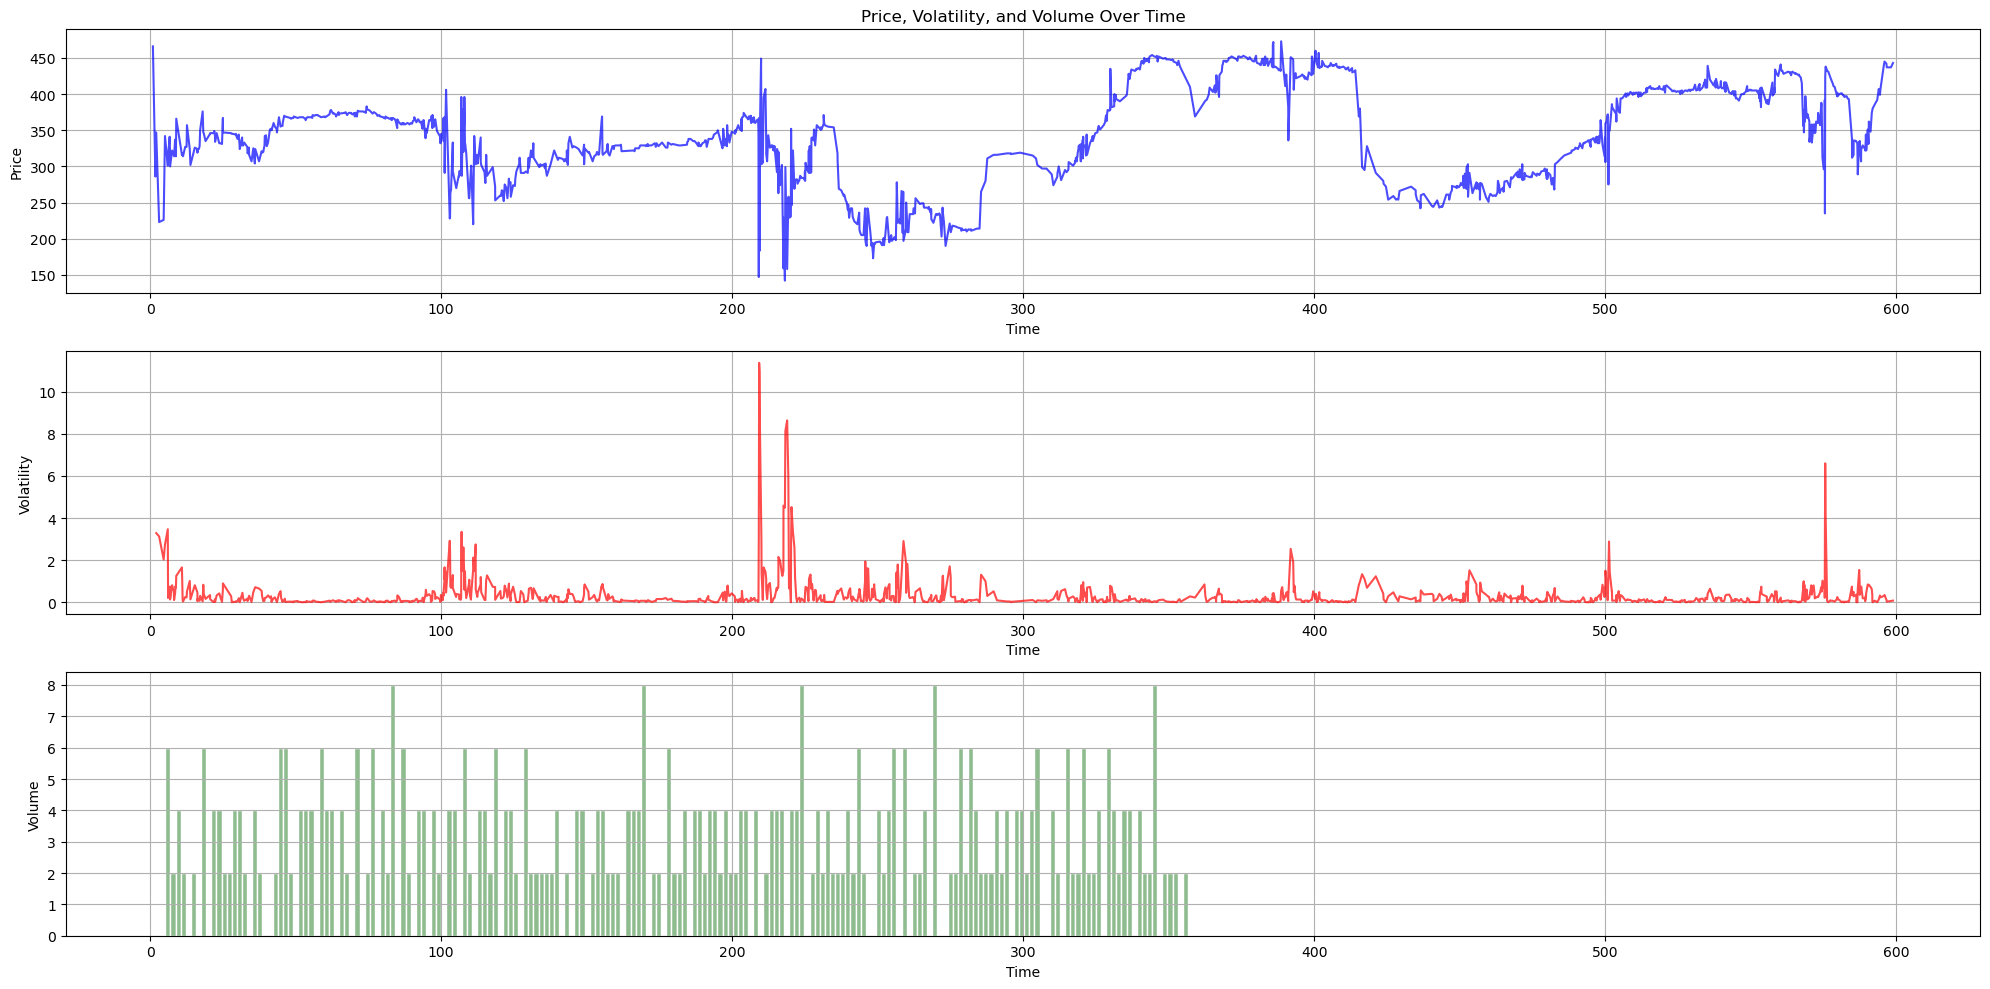

In [278]:
prices = 'smith_chart_vol_200_0_tape.csv'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Load the CSV file, assuming headers might be auto-generated if not present
file_path = 'your_file.csv'  # Replace with the actual file path
df = pd.read_csv(prices, header=None)  # Load without headers if they are not present

# Assign column names based on the format you shared
df.columns = ['Type', 'Timestamp', 'Price']  # Adjust if these headers are incorrect

# For demonstration, we'll assume that 'Volume' data is available in the same CSV.
# If 'Volume' is available in a different CSV or a different format, let me know to adjust accordingly.

# Adding random volume data for this example (you can replace it with actual volume if available)
df['Volume'] = np.random.randint(100, 1000, size=len(df))  # Placeholder for volume data

# Calculate returns for volatility
df['Return'] = df['Price'].pct_change()

# Calculate rolling volatility (e.g., 20-period standard deviation of returns)
window_size = 2  # You can adjust this for shorter or longer-term volatility
df['Volatility'] = df['Return'].rolling(window=window_size).std() * np.sqrt(60)  # Annualize

# Extract time (x), price (y), volatility, and volume for plotting
x = df['Timestamp']
y = df['Price']
volatility = df['Volatility']


# Plotting using GridSpec layout
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1])  # 3x space for price plot, 1x each for volatility and volume

# Price plot (top)
ax1 = fig.add_subplot(gs[0])
ax1.plot(x, y, color='blue', linestyle='-', alpha=0.7)
ax1.set_xlabel('Time')
ax1.set_ylabel('Price')
ax1.grid(True)
ax1.set_title('Price, Volatility, and Volume Over Time')

# Volatility plot (middle)
ax2 = fig.add_subplot(gs[1], sharex=ax1)  # Share the x-axis with the price plot
ax2.plot(x, volatility, color='red', linestyle='-', alpha=0.7)
ax2.set_xlabel('Time')
ax2.set_ylabel('Volatility')
ax2.grid(True)

# Volume plot (bottom)
ax3 = fig.add_subplot(gs[2], sharex=ax1)  # Share the x-axis with the price plot
ax3.hist(blotters['Timestamp'], bins=200, edgecolor='white', alpha=1, color = 'darkseagreen')
ax3.set_xlabel('Time')
ax3.grid(True)
ax3.set_ylabel('Volume')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### Now plotting best bid and best ask along with where the trade happens 

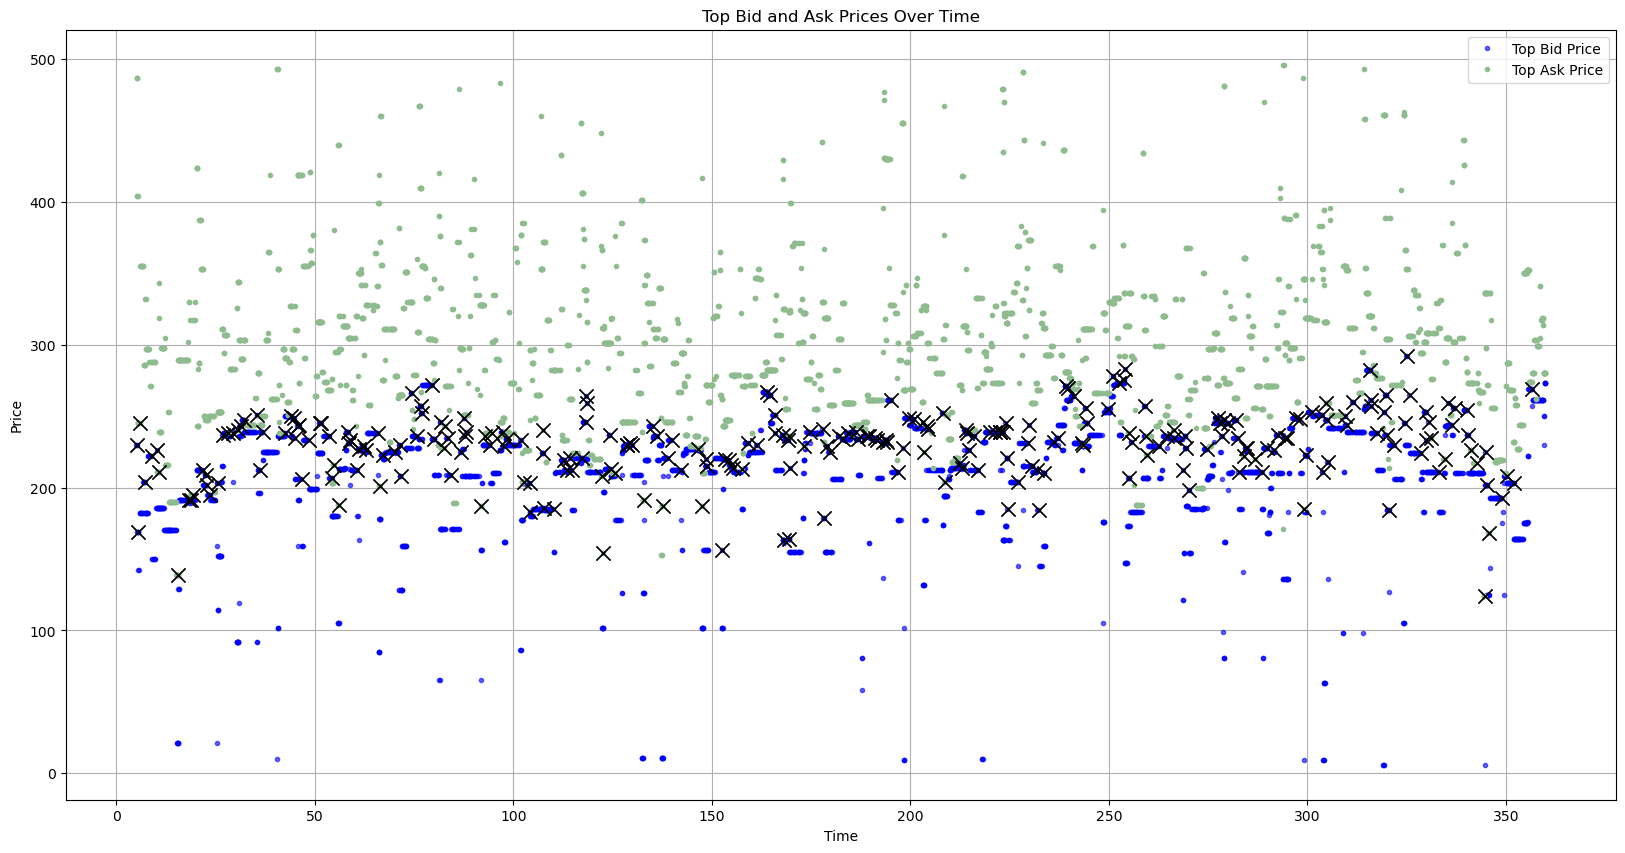

In [285]:
import matplotlib.pyplot as plt

# Extract bid and ask total quantities over time
time_series = expanded_df['Time']
bid_total_depth = expanded_df['Bid Total Quantity']
ask_total_depth = expanded_df['Ask Total Quantity']
import seaborn as sns
# Top Bid/Ask Levels: Extract and visualize the top bid and ask prices at each time point
plt.figure(figsize=(20, 10))
plt.plot(expanded_df['Time'], [float(prices[-1]) if prices else None for prices in expanded_df['Bid Prices']], label='Top Bid Price', color='blue', marker = '.', linestyle = '', alpha = 0.6)
plt.plot(expanded_df['Time'], [float(prices[0]) if prices else None for prices in expanded_df['Ask Prices']], label='Top Ask Price', color='darkseagreen', marker = '.', linestyle = 'none')
plt.plot(blotters['Timestamp'], blotters['Price'], marker = 'x', linestyle = 'none', color = 'black', markersize = 10)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Top Bid and Ask Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()



In [291]:
import pandas as pd

# Specify the file path

# Load the CSV file into a DataFrame
# Use header=None if there is no header row, otherwise specify column names.
prices_df = pd.read_csv(prices, header=None, names=['Type', 'Price', 'Quantity'])

# Display the DataFrame
df.head(5)


,Type,Timestamp,Price,Volume,Return,Volatility
0,Trd,0.950,466.0,772,NaN,NaN
1,Trd,1.800,286.0,501,-0.386266,NaN
2,Trd,2.087,347.0,575,0.213287,3.283886
3,Trd,3.088,223.0,496,-0.357349,3.125499
4,Trd,4.638,226.0,563,0.013453,2.030964


1. Order Book Depth Analysis:
Total Depth Over Time: Plot how the bid and ask depths (total quantities) change over time to understand how liquidity fluctuates during market events.
Depth Comparison: Compare the bid and ask depths to evaluate market imbalance (e.g., excess supply or demand) at any given time.
2. Price Level Analysis:
Top Bid/Ask Levels: Extract and visualize the top bid and ask prices at each time point to track how the spread (difference between the top bid and ask prices) changes. This is useful for understanding market efficiency and price competitiveness.
Price Heatmap: Create a heatmap to display the distribution of bid and ask prices over time, showing which price levels received the most quantity.
3. Market Spread Analysis:
Spread over Time: Calculate the difference between the best bid and best ask price over time and plot it to visualize periods of tight vs. wide spreads. A tighter spread generally indicates better liquidity and reduced transaction costs.
Spread vs. Volatility: Compare market spread with market volatility (calculated from price changes) to see how the spread responds during volatile market periods.
4. Market Impact Analysis:
Order Quantity and Price Impact: Analyze how large quantities in the bid or ask affect subsequent price movements. For instance, if the bid quantity increases significantly, does it typically lead to a price increase?
Cumulative Market Orders: Sum up the quantity of all bid and ask orders and observe if an imbalance correlates with price movements.
5. Trader Behavior Analysis:
Order Flow Analysis: Track if traders are predominantly submitting more bids or asks over time. This could indicate shifts in sentiment.
Price Momentum and Orders: Observe the correlation between trader actions and price momentum. For instance, check whether increased buying (larger bid quantities) consistently leads to rising prices.
6. Liquidity and Volatility Analysis:
Liquidity Correlation with Price Volatility: Assess whether low liquidity (low total bid/ask quantity) correlates with higher price volatility. This can help understand risk areas where the market is more vulnerable to price swings.
Illiquid Periods: Identify illiquid periods where total bid and ask quantities are low and assess the price behavior during those times.
7. Order Book Visualization:
3D Surface Plot: Plot a 3D surface showing price levels (x-axis), time (y-axis), and total quantities (z-axis) to provide a visual representation of order book depth over time.
Order Book Animation: Animate the order book to show how bid and ask prices and quantities evolve, giving an intuitive understanding of how the market forms and shifts.
8. Identifying Trading Signals:
Volume and Price Action: Use the bid and ask data to identify trading signals such as support and resistance levels. Large quantities can often act as barriers that prevent the price from moving further.
Imbalance Signals: Identify significant imbalances between bid and ask quantities, which could signal potential price movements.
9. Build Market Metrics:
VWAP (Volume Weighted Average Price): Calculate VWAP for the given order book data to understand the average price weighted by volume, often used as a benchmark by traders.
Market Imbalance Indicator: Develop an indicator based on the difference between bid and ask volumes to predict price direction changes.
10. Machine Learning Application:
Feature Engineering: Use the time series data to extract features such as:
Spread width.
Top bid and ask price levels.
Bid/ask imbalance.
Price momentum.
Price Prediction Model: Use these features in a machine learning model (e.g., LSTM for time-series forecasting) to predict future price changes or to determine if price will move up or down.
Trader Behavior Clustering: Cluster different time points based on bid and ask dynamics to see if there are common market conditions that repeat (e.g., times of high competition vs. illiquidity).
